 #  <center> YELO BANK TECHNICAL SKILL TEST 🔔

# Task 1 
###### (Use loan_data.xlsx  file for Task 1) 📌




Title | Definition
---|---------
`CUSTOMER_NO`| id of costumer
`BEGIN_DATE` |  open date of loan
`END_DATE` | close date of loan  
`CLOSE_DATE` | actual close date of loan
`BRANCH_NAME` | name of product
`INTEREST_RATE` | loan interest rate(annual)
`BIRTH_DATE` |  birth date of customer
`PRODUCT_NAME` | name of product
`AMOUNT` |  given amount of loan
`REMAIN_AMOUNT` | customer's debt to bank
`CATEGORY` |  cutomer category (GB -good bank / BB- bad bank) 
`GSM_NO` |  Mobile Phone 



 ## <center> Customer Segmentation

##  1. Data cleaning & Preparation 🧹
### Tips for data cleaning : 
 ##### Pay attention  ❗
- Data types
- Null values
- Extreme values
- Duplicates
- Correct telephone number format (ex.: 994752000000 , numbers should be start with 99475, 99476, 99433 )

## 2. EDA ( Exploratory Data Analysis) 📈
### Tips :
1. Yearly and monthly sales amount and count (using pivot_table func.)
2. Active & non-active customer distribution by product names
3. Your approach 🙂 (mandatory)

## 3. Segmentation for loan offer  🙋🏻🙋🏻‍♂️
##### Only these customers are able to take loan:

1. Age between 25 and 64
2. Category not in "BB"
3. Branch name not like "UPA"
4. Don't have active loan or remain amount < 60 %

### After defining your segment follow this steps :

- Split your segment into Target and Test customers
- Test clients should be 10 % of segment
- Use stratified sampling method for choosing test clients
- Show them as by creating a new column named as "TYPE"






# <center> Task 2

#### SQL task  ==> check attached excel file 

# <center> Task 3

## Insight Finding 📝

Analyze and visualize data and present your findings (preferably PPT)

Prepare the business proposal using data set provided in PYTHON task. Final presentation need to include following insights:


1.	Customer Segmentations and their profile (Exp. Customer between age 25-30 majorly set to require loans between X-Y AZN with Z month period)
2.	Top 3 customer segments which can increase sales if targeted properly. (Exp. Students can be targeted during back to school period as they are not targeted properly and have less risk based on data)
3.	The new bank product to increase the sales and cover customers need. ( Exp. Students credit X AZN with Y period can be attractive and cover majority of customer base.)


###### Note: Business proposal need to be part of business story telling within presentation.

### <center> GOOD LUCK!

## <center> THANKS MAN 🤝

# Task 1

## Data cleaning & Preparation 🧹

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

%matplotlib inline

In [16]:
df = pd.read_excel('loan_data.xlsx')
df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO
0,462598,20-03-1984,2021-05-04,2024-05-04,NaT,11S,19.9,İstehlak kredit (Cash),8000.0,2601.80,GB,994758000022
1,469638,01-12-1977,2021-06-14,2025-03-14,2023-09-29,11S,19.9,İstehlak kredit (Cash),9000.0,0.00,GB,994758000023
2,489282,18-09-1997,2021-09-01,2024-09-01,2022-03-16,11S,18.3,İstehlak kredit (Cash),7000.0,0.00,GB,994758000025
3,490443,03-01-1987,2021-09-06,2024-09-06,2023-05-18,11S,20.0,İstehlak kredit (Cash),5000.0,0.00,GB,994758000026
4,331469,15-09-1989,2021-09-10,2024-09-10,2021-12-06,11S,17.0,İstehlak kredit (Cash),24000.0,0.00,GB,994758000027
...,...,...,...,...,...,...,...,...,...,...,...,...
20069,522540,06-06-1970,2021-12-10,2024-12-10,2022-08-30,O,18.0,İstehlak kredit (Cash),14200.0,0.00,GB,NaN
20070,474877,23-01-1988,2023-09-05,2026-09-05,NaT,O,13.9,İstehlak kredit - Online,17000.0,15995.80,GB,994767003628
20071,812387,18-01-1998,2023-12-04,2025-12-04,NaT,O,12.9,İstehlak kredit - Online,10000.0,9678.58,GB,NaN
20072,202641,24-06-1959,2023-08-14,2024-07-14,NaT,O,13.5,Əmanətçi krediti,1500.0,810.51,GB,NaN


In [17]:
df.describe()

,CUSTOMER_NO,BEGIN_DATE,END_DATE,CLOSE_DATE,INTEREST_RATE,AMOUNT,REMAIN_AMOUNT
count,20074.000000,20074,20074,8744,20074.000000,20074.000000,20074.000000
mean,518376.961144,2022-11-27 16:06:58.929958912,2025-07-12 18:27:22.004583168,2023-02-06 19:14:46.001829888,16.226243,9938.329899,4292.121747
min,12702.000000,2021-01-14 00:00:00,2024-02-15 00:00:00,2021-03-09 00:00:00,4.000000,300.000000,0.000000
25%,404840.500000,2022-05-12 00:00:00,2024-09-12 00:00:00,2022-09-09 00:00:00,14.900000,4000.000000,0.000000
50%,519707.500000,2023-01-10 00:00:00,2025-05-19 00:00:00,2023-04-06 00:00:00,16.000000,7000.000000,1015.275000
75%,665035.000000,2023-08-04 00:00:00,2026-03-16 00:00:00,2023-08-31 00:00:00,17.000000,13000.000000,5787.732500
max,824158.000000,2023-12-30 00:00:00,2028-11-30 00:00:00,2023-12-30 00:00:00,29.000000,200000.000000,105080.830000
std,184675.378399,NaN,NaN,NaN,2.305223,9229.274894,7251.010323


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20074 entries, 0 to 20073
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUSTOMER_NO    20074 non-null  int64         
 1   BIRTH_DATE     20074 non-null  object        
 2   BEGIN_DATE     20074 non-null  datetime64[ns]
 3   END_DATE       20074 non-null  datetime64[ns]
 4   CLOSE_DATE     8744 non-null   datetime64[ns]
 5   BRANCH_NAME    20074 non-null  object        
 6   INTEREST_RATE  20074 non-null  float64       
 7   PRODUCT_NAME   20074 non-null  object        
 8   AMOUNT         20074 non-null  float64       
 9   REMAIN_AMOUNT  20074 non-null  float64       
 10  CATEGORY       20074 non-null  object        
 11  GSM_NO         19036 non-null  object        
dtypes: datetime64[ns](3), float64(3), int64(1), object(5)
memory usage: 1.8+ MB


In [21]:
df.isna().sum()

CUSTOMER_NO          0
BIRTH_DATE           0
BEGIN_DATE           0
END_DATE             0
CLOSE_DATE       11330
BRANCH_NAME          0
INTEREST_RATE        0
PRODUCT_NAME         0
AMOUNT               0
REMAIN_AMOUNT        0
CATEGORY             0
GSM_NO            1038
dtype: int64

In [24]:
df.dtypes

CUSTOMER_NO               int64
BIRTH_DATE               object
BEGIN_DATE       datetime64[ns]
END_DATE         datetime64[ns]
CLOSE_DATE       datetime64[ns]
BRANCH_NAME              object
INTEREST_RATE           float64
PRODUCT_NAME             object
AMOUNT                  float64
REMAIN_AMOUNT           float64
CATEGORY                 object
GSM_NO                   object
dtype: object

In [25]:
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    print(f"\nSample values in {col}:")
    print(df[col].head())


Sample values in BIRTH_DATE:
0    20-03-1984
1    01-12-1977
2    18-09-1997
3    03-01-1987
4    15-09-1989
Name: BIRTH_DATE, dtype: object

Sample values in BEGIN_DATE:
0   2021-05-04
1   2021-06-14
2   2021-09-01
3   2021-09-06
4   2021-09-10
Name: BEGIN_DATE, dtype: datetime64[ns]

Sample values in END_DATE:
0   2024-05-04
1   2025-03-14
2   2024-09-01
3   2024-09-06
4   2024-09-10
Name: END_DATE, dtype: datetime64[ns]

Sample values in CLOSE_DATE:
0          NaT
1   2023-09-29
2   2022-03-16
3   2023-05-18
4   2021-12-06
Name: CLOSE_DATE, dtype: datetime64[ns]


In [ ]:
null_analysis = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

null_summary = pd.DataFrame({
    'null count': null_analysis,
    'null percentage': null_percentages
})
print(null_summary)

In [26]:
def analyze_phone_numbers(df):
    valid_phones = df['GSM_NO'].dropna().astype(str)
    prefix_99475 = valid_phones.str.startswith('99475').sum()
    prefix_99476 = valid_phones.str.startswith('99476').sum()
    prefix_99433 = valid_phones.str.startswith('99433').sum()
    total_phones = len(df)
    missing_phones = df['GSM_NO'].isna().sum()
    valid_format = prefix_99475 + prefix_99476 + prefix_99433
    invalid_format = len(valid_phones) - valid_format
    
    print("=== Phone Number Analysis ===")
    print(f"Total records: {total_phones}")
    print(f"Missing numbers: {missing_phones}")
    print(f"Valid format: {valid_format}")
    print(f"Invalid format: {invalid_format}")
    print("\nPrefix Distribution:")
    print(f"99475 prefix: {prefix_99475}")
    print(f"99476 prefix: {prefix_99476}")
    print(f"99433 prefix: {prefix_99433}")

analyze_phone_numbers(df)

=== Phone Number Analysis ===
Total records: 20074
Missing numbers: 1038
Valid format: 18819
Invalid format: 217

Prefix Distribution:
99475 prefix: 7231
99476 prefix: 5837
99433 prefix: 5751


In [42]:
customer_loan_counts = df['CUSTOMER_NO'].value_counts()
customers_with_multiple_loans = customer_loan_counts[customer_loan_counts > 1]

print(f"unique customers: {len(customer_loan_counts)}")
print(f"multiple loan customers: {len(customers_with_multiple_loans)}")
print(customer_loan_counts.value_counts().sort_index())

unique customers: 17160
multiple loan customers: 2398
count
1     14762
2      2018
3       299
4        55
5        16
6         5
7         1
8         2
9         1
17        1
Name: count, dtype: int64


=== outliers ===

AMOUNT statistics:
count     20074.000000
mean       9938.329899
std        9229.274894
min         300.000000
25%        4000.000000
50%        7000.000000
75%       13000.000000
max      200000.000000
Name: AMOUNT, dtype: float64


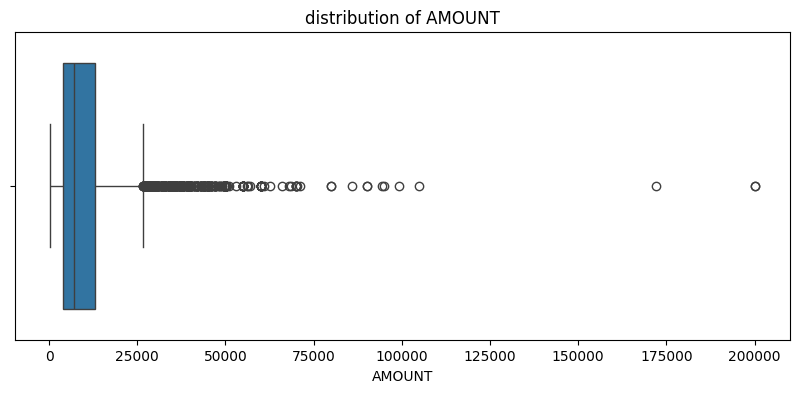


INTEREST_RATE statistics:
count    20074.000000
mean        16.226243
std          2.305223
min          4.000000
25%         14.900000
50%         16.000000
75%         17.000000
max         29.000000
Name: INTEREST_RATE, dtype: float64


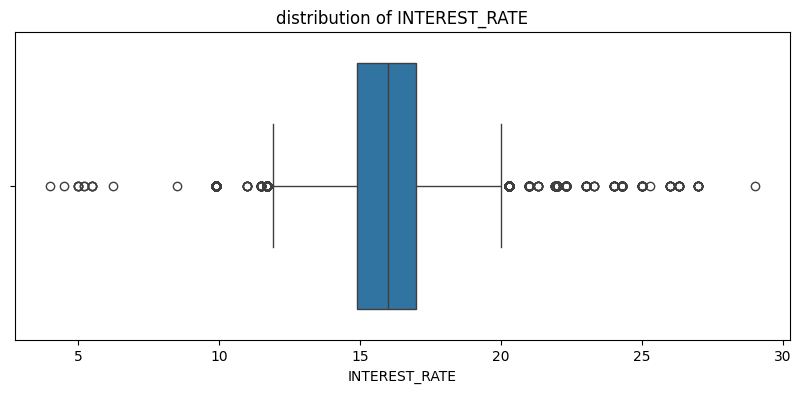


REMAIN_AMOUNT statistics:
count     20074.000000
mean       4292.121747
std        7251.010323
min           0.000000
25%           0.000000
50%        1015.275000
75%        5787.732500
max      105080.830000
Name: REMAIN_AMOUNT, dtype: float64


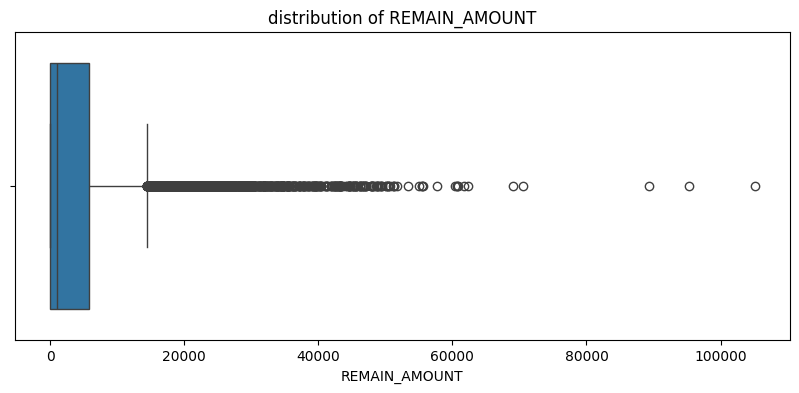

In [46]:
numeric_columns = ['AMOUNT', 'INTEREST_RATE', 'REMAIN_AMOUNT']

print("=== outliers ===")
for col in numeric_columns:
    print(f"\n{col} statistics:")
    print(df[col].describe())
    
    plt.figure(figsize=(10, 4))
    plt.title(f"distribution of {col}")
    sns.boxplot(x=df[col])
    plt.show()

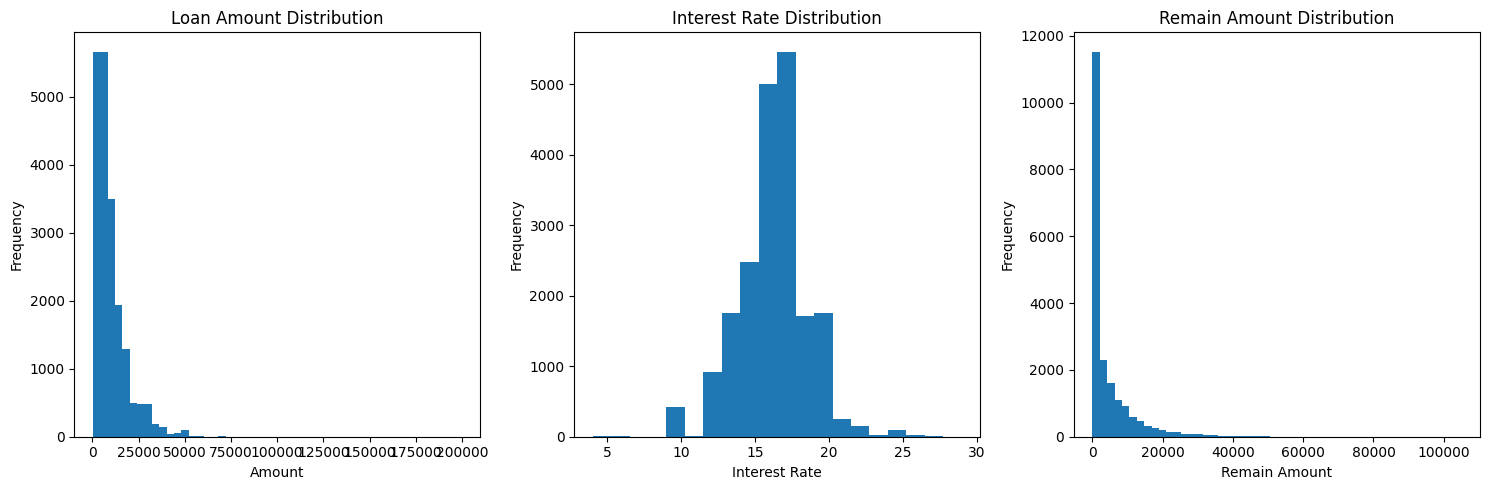

In [ ]:
plt.figure(figsize=(15, 5))

# amount 
plt.subplot(1, 3, 1)
plt.hist(df['AMOUNT'], bins=50)
plt.title('Loan Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# interest rate
plt.subplot(1, 3, 2)
plt.hist(df['INTEREST_RATE'], bins=20)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

# remain amount
plt.subplot(1, 3, 3)
plt.hist(df['REMAIN_AMOUNT'], bins=50)
plt.title('Remain Amount Distribution')
plt.xlabel('Remain Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [48]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))][column]

# Print outlier summary for each variable
for column in ['AMOUNT', 'INTEREST_RATE', 'REMAIN_AMOUNT']:
    outliers = identify_outliers(df, column)
    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")


Outliers in AMOUNT:
Number of outliers: 1162
Percentage of outliers: 5.79%

Outliers in INTEREST_RATE:
Number of outliers: 1825
Percentage of outliers: 9.09%

Outliers in REMAIN_AMOUNT:
Number of outliers: 1624
Percentage of outliers: 8.09%


In [35]:
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Missing Phone Numbers',
        'Invalid Phone Format',
        'Customers with Multiple Loans',
        'Min Loan Amount',
        'Max Loan Amount',
        'Min Interest Rate',
        'Max Interest Rate',
        'Min Remain Amount',
        'Max Remain Amount'
    ],
    'Value': [
        len(df),
        df['GSM_NO'].isna().sum(),
        len(df['GSM_NO'].dropna()) - (df['GSM_NO'].astype(str).str.startswith('99475').sum() + 
                                     df['GSM_NO'].astype(str).str.startswith('99476').sum() + 
                                     df['GSM_NO'].astype(str).str.startswith('99433').sum()),
        len(customers_with_multiple_loans),
        df['AMOUNT'].min(),
        df['AMOUNT'].max(),
        df['INTEREST_RATE'].min(),
        df['INTEREST_RATE'].max(),
        df['REMAIN_AMOUNT'].min(),
        df['REMAIN_AMOUNT'].max()
    ]
})

pd.DataFrame(summary_stats)

,Metric,Value
0,Total Records,20074.00
1,Missing Phone Numbers,1038.00
2,Invalid Phone Format,217.00
3,Customers with Multiple Loans,2398.00
4,Min Loan Amount,300.00
5,Max Loan Amount,200000.00
6,Min Interest Rate,4.00
7,Max Interest Rate,29.00
8,Min Remain Amount,0.00
9,Max Remain Amount,105080.83


## EDA ( Exploratory Data Analysis) 📈

In [51]:
date_columns = ['BIRTH_DATE', 'BEGIN_DATE', 'END_DATE', 'CLOSE_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

### Yearly and monthly sales analysis using pivot_table


In [56]:
df['Year'] = df['BEGIN_DATE'].dt.year
df['Month'] = df['BEGIN_DATE'].dt.month

#  pivot table 
yearly_analysis = pd.pivot_table(df, 
                               values=['AMOUNT', 'CUSTOMER_NO'],
                               index='Year',
                               aggfunc={'AMOUNT': 'sum', 'CUSTOMER_NO': 'count'})
yearly_analysis.columns = ['Total Amount', 'Number of Loans']
print("Yearly Analysis:")
print(yearly_analysis)

# Create pivot table for monthly analysis
monthly_analysis = pd.pivot_table(df, 
                                values=['AMOUNT', 'CUSTOMER_NO'],
                                index=['Year', 'Month'],
                                aggfunc={'AMOUNT': 'sum', 'CUSTOMER_NO': 'count'})
monthly_analysis.columns = ['Total Amount', 'Number of Loans']

Yearly Analysis:
      Total Amount  Number of Loans
Year                               
2021    32825320.0             3098
2022    64071831.0             6837
2023   102604883.4            10139


### active & non-active customer distribution by product names

loan status distribution by product:
Loan_Status               Active  Closed
PRODUCT_NAME                            
İstehlak kredit (Cash)      7128    7193
İstehlak kredit - Online    3674    1311
İstehlak krediti              21      22
Əmanətçi krediti             507     218


<Figure size 1200x600 with 0 Axes>

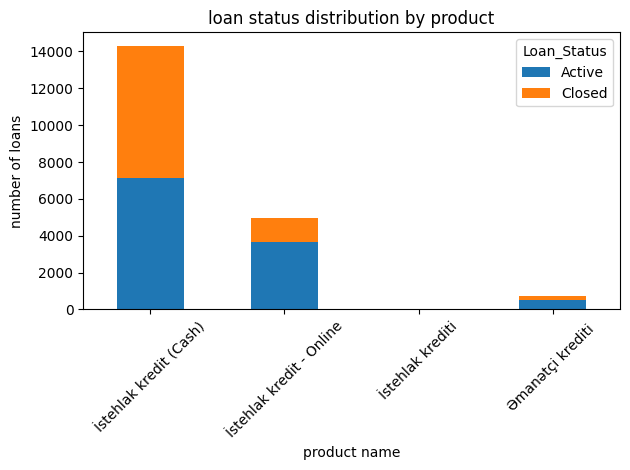

In [86]:
df['Loan_Status'] = 'Active'
df.loc[df['CLOSE_DATE'].notna(), 'Loan_Status'] = 'Closed'

# pivot table for loan status by product
loan_status_by_product = pd.pivot_table(df,
                                      values='CUSTOMER_NO',
                                      index='PRODUCT_NAME',
                                      columns='Loan_Status',
                                      aggfunc='count',
                                      fill_value=0)

print("loan status distribution by product:")
print(loan_status_by_product)

# visualization
plt.figure(figsize=(12, 6))
loan_status_by_product.plot(kind='bar', stacked=True)
plt.title('loan status distribution by product')
plt.xlabel('product name')
plt.ylabel('number of loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### additional analysis - interest rate distribution by product

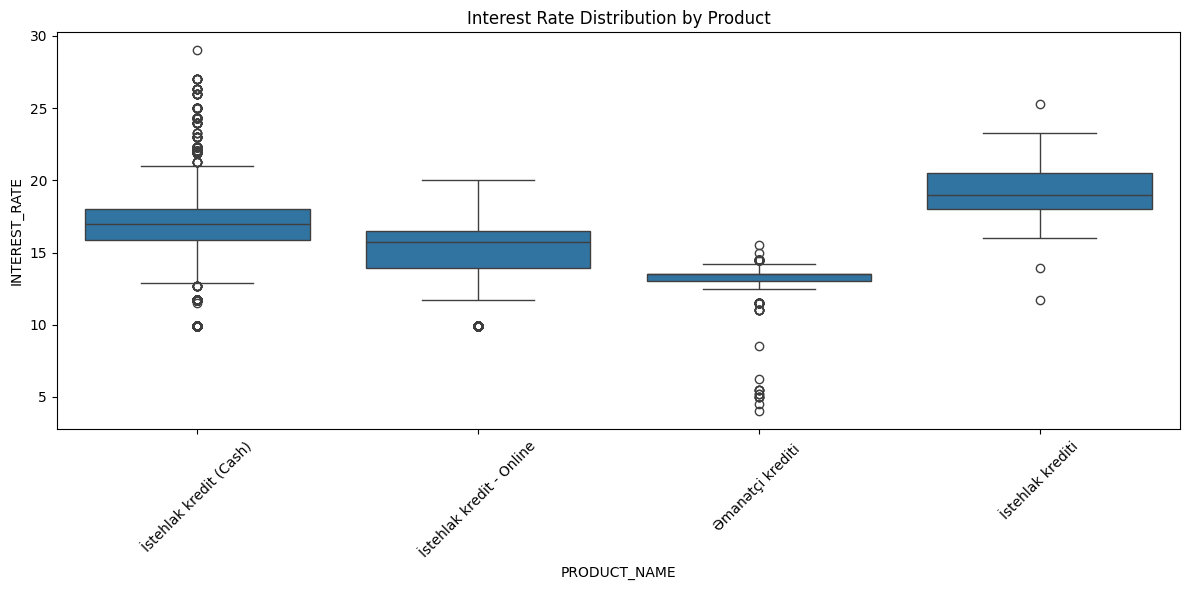


average loan amount by product:
                                  mean  count
PRODUCT_NAME                                 
İstehlak kredit (Cash)    10082.026534  14321
İstehlak kredit - Online   9457.633581   4985
İstehlak krediti          35473.255814     43
Əmanətçi krediti           8890.591724    725


In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PRODUCT_NAME', y='INTEREST_RATE')
plt.xticks(rotation=45)
plt.title('Interest Rate Distribution by Product')
plt.tight_layout()
plt.show()

# average loan amount by product
avg_amount_by_product = df.groupby('PRODUCT_NAME')['AMOUNT'].agg(['mean', 'count'])
print("\naverage loan amount by product:")
print(avg_amount_by_product)

### customer segmentation

In [85]:
# age
df['AGE'] = (datetime.now() - df['BIRTH_DATE']).dt.days / 365.25

df['REMAIN_PERCENTAGE'] = (df['REMAIN_AMOUNT'] / df['AMOUNT']) * 100

# criteria
eligible_customers = df[
    (df['AGE'] >= 25) & 
    (df['AGE'] <= 64) &
    (df['CATEGORY'] != 'BB') &
    (df['BRANCH_NAME'] != 'UPA') &
    ((df['Loan_Status'] == 'Closed') | (df['REMAIN_PERCENTAGE'] < 60))
].copy()

print("all customers:", len(df))
print("eligible customers:", len(eligible_customers))

all customers: 20074
eligible customers: 11615


### prepare for stratified sampling

In [88]:
# stratification features
eligible_customers['AGE_GROUP'] = pd.qcut(eligible_customers['AGE'], q=5, labels=['A', 'B', 'C', 'D', 'E'])
eligible_customers['AMOUNT_GROUP'] = pd.qcut(eligible_customers['AMOUNT'], q=5, labels=['1', '2', '3', '4', '5'])

# for better stratification combine features
eligible_customers['STRAT_GROUP'] = eligible_customers['AGE_GROUP'].astype(str) + eligible_customers['AMOUNT_GROUP'].astype(str)

# target and test groups
target_group, test_group = train_test_split(
    eligible_customers,
    test_size=0.1,
    stratify=eligible_customers['STRAT_GROUP'],
    random_state=42
)

target_group['TYPE'] = 'TARGET'
test_group['TYPE'] = 'TEST'

# combine and clean
final_df = pd.concat([target_group, test_group])
final_df = final_df.drop(['AGE_GROUP', 'AMOUNT_GROUP', 'STRAT_GROUP'], axis=1)

print("\nfinal distribution:")
print(final_df['TYPE'].value_counts(normalize=True))

# sample results
print("\nsample of segmented customers:")
print(final_df[['CUSTOMER_NO', 'AGE', 'AMOUNT', 'TYPE']].head(10))

# statistica by segment
print("\nsegment statistica:")
print(final_df.groupby('TYPE').agg({
    'AGE': ['count', 'mean'],
    'AMOUNT': ['mean', 'min', 'max'],
    'INTEREST_RATE': 'mean'
}).round(2))


final distribution:
TYPE
TARGET    0.899957
TEST      0.100043
Name: proportion, dtype: float64

sample of segmented customers:
       CUSTOMER_NO        AGE   AMOUNT    TYPE
13571       603018  61.930185   7000.0  TARGET
2175        263549  32.429843   8000.0  TARGET
6554        565979  36.164271  40000.0  TARGET
2283        402429  35.780972   5000.0  TARGET
10744       475573  30.143737   8000.0  TARGET
7750        491933  57.911020   7950.0  TARGET
16734       403171  55.112936   4000.0  TARGET
10941       461588  36.323066  11000.0  TARGET
19900       561904  35.841205  15000.0  TARGET
16842       672905  33.744011   2700.0  TARGET

segment statistica:
          AGE          AMOUNT                  INTEREST_RATE
        count   mean     mean    min       max          mean
TYPE                                                        
TARGET  10453  41.12  9414.56  300.0  200000.0         16.81
TEST     1162  41.09  9433.96  300.0   60000.0         16.92


In [89]:
final_df

,CUSTOMER_NO,BIRTH_DATE,BEGIN_DATE,END_DATE,CLOSE_DATE,BRANCH_NAME,INTEREST_RATE,PRODUCT_NAME,AMOUNT,REMAIN_AMOUNT,CATEGORY,GSM_NO,Year,Month,Loan_Status,AGE,REMAIN_PERCENTAGE,TYPE
13571,603018,1963-02-10,2022-06-01,2025-06-01,2023-03-30,MR,17.0,İstehlak kredit (Cash),7000.0,0.0,GB,994334002393,2022,6,Closed,61.930185,0.0,TARGET
2175,263549,1992-08-11,2022-12-14,2025-12-14,2023-12-07,28M,17.0,İstehlak kredit (Cash),8000.0,0.0,GB,994758002187,2022,12,Closed,32.429843,0.0,TARGET
6554,565979,1988-11-16,2023-02-16,2027-02-16,2023-04-26,DIGITAL,18.0,İstehlak kredit (Cash),40000.0,0.0,GB,994767003347,2023,2,Closed,36.164271,0.0,TARGET
2283,402429,1989-04-05,2021-10-19,2024-10-19,2022-11-16,28M,22.0,İstehlak kredit (Cash),5000.0,0.0,GB,994758002291,2021,10,Closed,35.780972,0.0,TARGET
10744,475573,1994-11-24,2021-07-06,2024-07-06,2022-08-22,M,20.3,İstehlak kredit (Cash),8000.0,0.0,GB,994334000042,2021,7,Closed,30.143737,0.0,TARGET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,617914,1992-11-14,2022-06-29,2025-06-29,2023-10-02,28M,16.0,İstehlak kredit - Online,10000.0,0.0,GB,994758002447,2022,6,Closed,32.169747,0.0,TEST
3728,447003,1986-01-01,2022-07-18,2025-07-18,2022-09-27,6S,16.5,İstehlak kredit (Cash),25200.0,0.0,GB,994758003683,2022,7,Closed,39.039014,0.0,TEST
10854,330935,1986-09-03,2021-04-29,2024-04-29,2021-10-11,M,19.9,İstehlak kredit (Cash),5000.0,0.0,GB,994758000090,2021,4,Closed,38.368241,0.0,TEST
17771,508460,1975-12-18,2021-11-05,2024-11-05,2023-04-19,N,18.0,İstehlak kredit (Cash),7000.0,0.0,GB,994334004185,2021,11,Closed,49.078713,0.0,TEST


In [74]:
final_df.groupby('TYPE')['AGE'].describe()


,count,mean,std,min,25%,50%,75%,max
TYPE,,,,,,,,
TARGET,10453.0,41.119991,10.127982,25.002053,33.062286,38.929500,48.035592,63.994524
TEST,1162.0,41.085544,10.064829,25.040383,32.917864,38.907598,48.049281,63.964408


In [75]:
final_df.groupby('TYPE')['AMOUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
TYPE,,,,,,,,
TARGET,10453.0,9414.559017,8649.550539,300.0,4000.0,6900.0,12000.0,200000.0
TEST,1162.0,9433.961274,8334.313155,300.0,3725.0,7000.0,12000.0,60000.0


In [76]:
pd.crosstab(final_df['TYPE'], final_df['PRODUCT_NAME'], normalize='index')

PRODUCT_NAME,İstehlak kredit (Cash),İstehlak kredit - Online,İstehlak krediti,Əmanətçi krediti
TYPE,,,,
TARGET,0.814886,0.155458,0.002296,0.027361
TEST,0.823580,0.149742,0.002582,0.024096


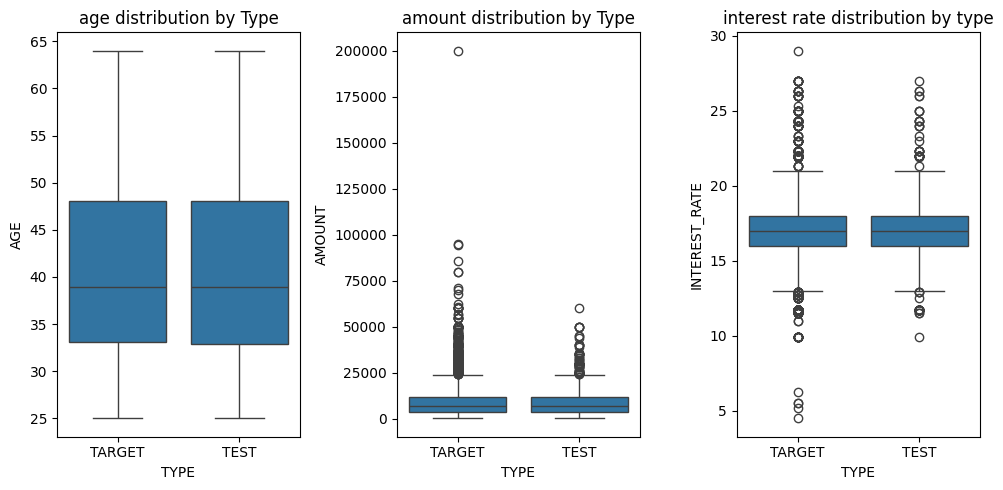

In [81]:
plt.figure(figsize=(10, 5))

# age 
plt.subplot(1, 3, 1)
sns.boxplot(data=final_df, x='TYPE', y='AGE')
plt.title('age distribution by Type')

# amount 
plt.subplot(1, 3, 2)
sns.boxplot(data=final_df, x='TYPE', y='AMOUNT')
plt.title('amount distribution by Type')

# interest rate 
plt.subplot(1, 3, 3)
sns.boxplot(data=final_df, x='TYPE', y='INTEREST_RATE')
plt.title('interest rate distribution by type')

plt.tight_layout()
plt.show()

# Task 2

In [108]:
# from pandasql import sqldf

# customer_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='CUSTOMER')
# credit_contracts_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='CREDIT_CONTRACTS')
# product_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='PRODUCT')
# transaction_df = pd.read_excel('DATA_ANALYTICS_EXAM_SQL.XLSX', sheet_name='TRANSACTION')

# monthly_income = customer_df[['CIF', 'AVERAGE_SALARY', 'AVERAGE_PENSION']].copy()
# monthly_income['MONTHLY_INCOME'] = monthly_income[['AVERAGE_SALARY', 'AVERAGE_PENSION']].fillna(0).max(axis=1)
# result = monthly_income[['CIF', 'MONTHLY_INCOME']]


# def sql_query(query):
#     return sqldf(query, globals())

# query = """
# SELECT 
#     CIF,
#     AVERAGE_SALARY + AVERAGE_PENSION as MONTHLY_INCOME
# FROM customer_df
# """

# result = sql_query(query)
# result

In [107]:
import duckdb

excel_file = 'DATA_ANALYTICS_EXAM_SQL.XLSX'
customer = pd.read_excel(excel_file, sheet_name='CUSTOMER')
credit_contracts = pd.read_excel(excel_file, sheet_name='CREDIT_CONTRACTS')
product = pd.read_excel(excel_file, sheet_name='PRODUCT')
transaction = pd.read_excel(excel_file, sheet_name='TRANSACTION')

con = duckdb.connect()
con.register('customer', customer)
con.register('credit_contracts', credit_contracts)
con.register('product', product)
con.register('transaction', transaction)

# CIF and monthly income
query1 = """
SELECT 
    CIF,
    AVERAGE_SALARY + AVERAGE_PENSION as MONTHLY_INCOME
FROM customer_df
"""
result1 = con.execute(query1).df()
print("Query 1 Result:")
print(result1.head())

# Average product duration
query2 = """
SELECT 
    p.PRODUCT_NAME,
    AVG(DATEDIFF('month', cc.OPEN_DATE, cc.CLOSE_DATE)) as AVG_MONTHS
FROM product p
JOIN credit_contracts cc ON p.PRODUCT_CODE = cc.PRODUCT_CODE
WHERE cc.CLOSE_DATE IS NOT NULL
GROUP BY p.PRODUCT_NAME
"""
result2 = con.execute(query2).df()
print("\nQuery 2 Result:")
print(result2.head())

# Customers with 2+ products by region
query3 = """
WITH CustomerProducts AS (
    SELECT 
        c.CIF,
        c.REGISTERED_CITY_REGION,
        COUNT(DISTINCT cc.PRODUCT_CODE) as PRODUCT_COUNT
    FROM customer c
    JOIN credit_contracts cc ON c.CIF = cc.CIF
    WHERE cc.STATUS = 'ACTIVE'
    GROUP BY c.CIF, c.REGISTERED_CITY_REGION
    HAVING COUNT(DISTINCT cc.PRODUCT_CODE) >= 2
)
SELECT 
    REGISTERED_CITY_REGION,
    COUNT(*) as CUSTOMER_COUNT
FROM CustomerProducts
GROUP BY REGISTERED_CITY_REGION
"""
result3 = con.execute(query3).df()
print("\nQuery 3 Result:")
print(result3)

# Last transaction by customer
query4 = """
WITH RankedTransactions AS (
    SELECT 
        c.CIF,
        t.TRANSACTION_TYPE,
        t.AMOUNT,
        t.DATE,
        ROW_NUMBER() OVER (PARTITION BY c.CIF ORDER BY t.DATE DESC) as rn
    FROM customer c
    JOIN credit_contracts cc ON c.CIF = cc.CIF
    JOIN transaction t ON cc.ACCOUNT_NUMBER = t.ACCOUNT_NUMBER
)
SELECT 
    CIF,
    TRANSACTION_TYPE,
    AMOUNT,
    DATE
FROM RankedTransactions
WHERE rn = 1
"""
result4 = con.execute(query4).df()
print("\nQuery 4 Result:")
print(result4.head())

# Birkart customers with transactions but no installments
query5 = """
SELECT DISTINCT 
    c.CIF,
    c.INCOME_TYPE,
    c.REGISTERED_CITY_REGION
FROM customer c
JOIN credit_contracts cc ON c.CIF = cc.CIF
JOIN transaction t ON cc.ACCOUNT_NUMBER = t.ACCOUNT_NUMBER
WHERE cc.PRODUCT_CODE in ('BRED','BBLK') 
AND c.CIF NOT IN (
    SELECT DISTINCT c2.CIF
    FROM customer c2
    JOIN credit_contracts cc2 ON c2.CIF = cc2.CIF
    JOIN transaction t2 ON cc2.ACCOUNT_NUMBER = t2.ACCOUNT_NUMBER
    WHERE t2.TRANSACTION_TYPE = 'Taksit'
)
"""
result5 = con.execute(query5).df()
print("\nQuery 5 Result:")
print(result5.head())

con.close()

Query 1 Result:
       CIF  MONTHLY_INCOME
0  1000001             257
1  1000002            1033
2  1000003             488
3  1000004            1860
4  1000005            1654

Query 2 Result:
       PRODUCT_NAME  AVG_MONTHS
0          Visa Red   35.900000
1        Visa Black   36.000000
2  Gündəlik Tələbat   28.957143

Query 3 Result:
  REGISTERED_CITY_REGION  CUSTOMER_COUNT
0               KHACHMAZ               1
1                SIYAZAN               1
2                   BAKU               5
3               GOBUSTAN               1
4               AGJABADI               2
5                   GAKH               1
6              CALILABAD               1
7               BEYLAQAN               1
8               ZAQATALA               1

Query 4 Result:
       CIF TRANSACTION_TYPE  AMOUNT       DATE
0  1000056              POS      66 2021-08-31
1  1000084           Online      91 2021-09-05
2  1000003           Online     268 2021-04-02
3  1000008              POS     522 2021-02-2